In [127]:
import numpy as np
import pandas as pd
from sknetwork.data import convert_edge_list
from bqMatrix import CustomBigQueryKNN

"""SUPERVISED:
Loading in data and showing knn feature
"""

onpoli = CustomBigQueryKNN()
onpoli.query_raw()
onpoli.get_skngraph()


In [128]:
people_of_interest = [
    "randyhillier",
    "PierrePoilievre",
]
for i in people_of_interest:
    print(f'Person of interest: {i} --> \
2 nearest neighbors: {onpoli.knn(i, 2)}')



Person of interest: randyhillier --> 2 nearest neighbors: {'Roman_Baber': 0.18400621118012422, 'DerekSloanCPC': 0.15894906895672137}
Person of interest: PierrePoilievre --> 2 nearest neighbors: {'erinotoole': 0.22095280432688746, 'anthonyfurey': 0.1088013297054839}


In [164]:
onpoli.knn("UWaterloo", 2)

{'UofT': 0.03884515010094268, 'WesternU': 0.03685599765372959}

In [297]:
onpoli.knn("fordnation", 2)

{'celliottability': 0.11105950773848412, 'CPHO_Canada': 0.10904298795929798}

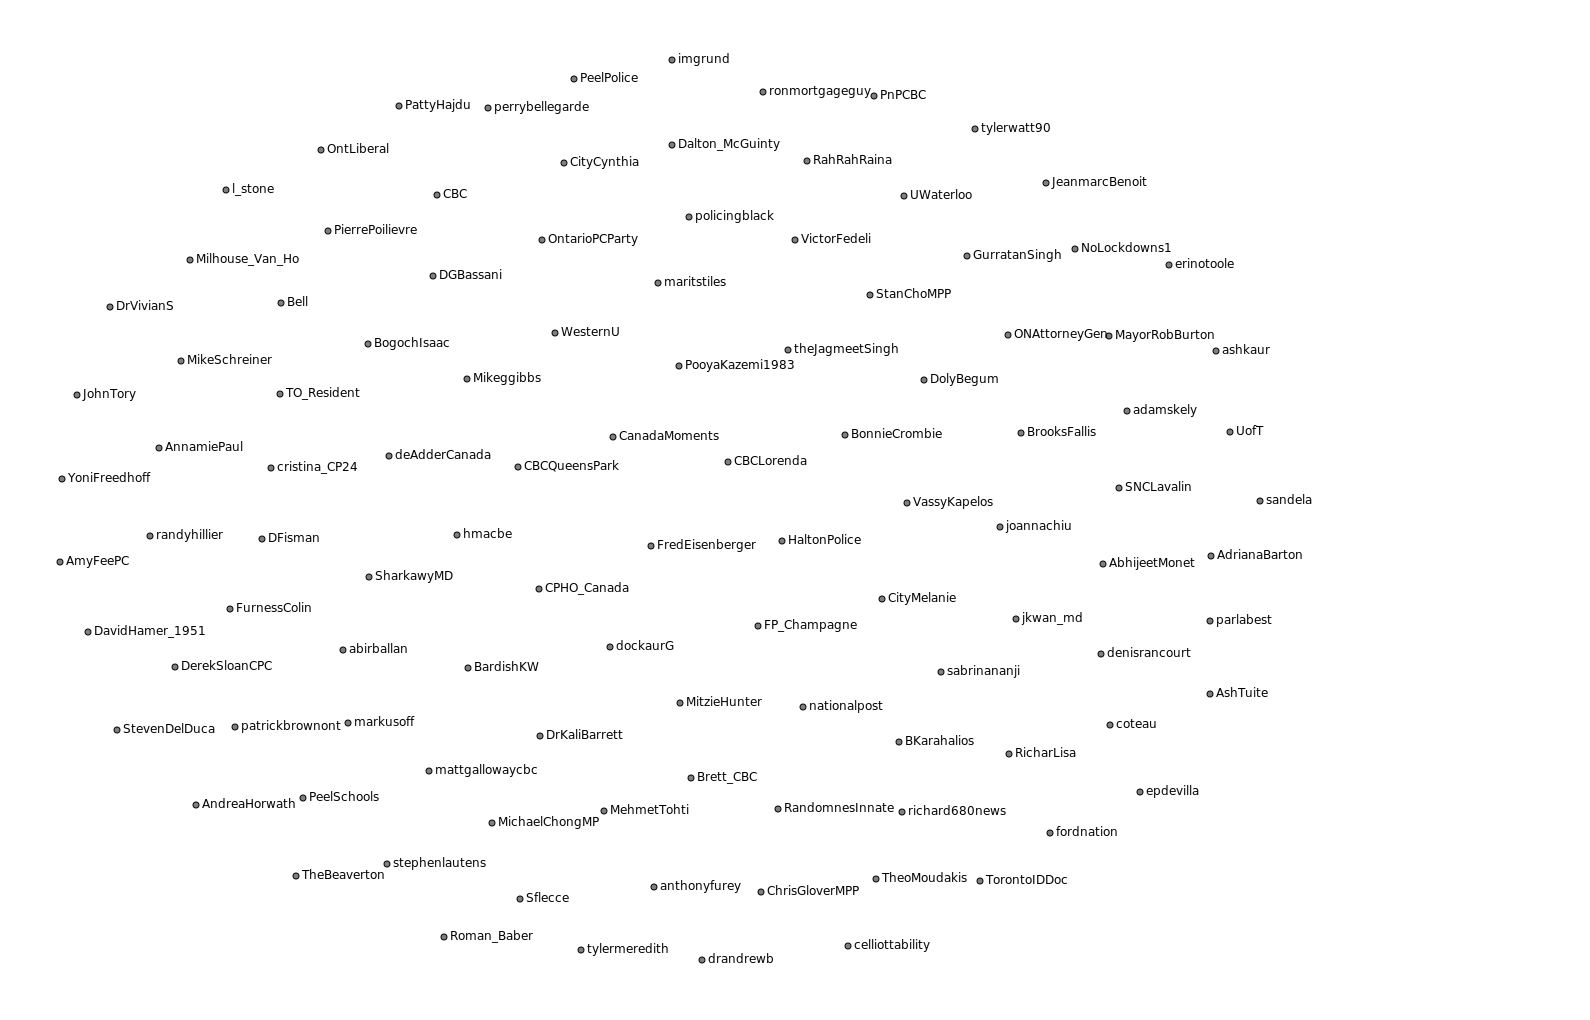

In [205]:
"""Unsupervised learning

We will explore the results of spring embedding 
and 2 different forms of clustering.  
"""
"""Using the soergel weight, without disregard for weak edges"""
from sknetwork.visualization import svg_graph

onpoli.get_skngraph(soergel=True)
graph = onpoli.graph 
names = graph.names
adjacency = graph.adjacency

image = svg_graph(
    adjacency, # default to spring embedding 
    names = names,
    scale=3,
    display_edges = True, # no clustering is used - arbitrary
    node_size_min = 3, # values set for aesthetics 
    node_size_max = 3,
    display_node_weight = True, # same as above
    edge_width_min = 0.05,
    edge_width_max = 0.05,  
    )
SVG(image)



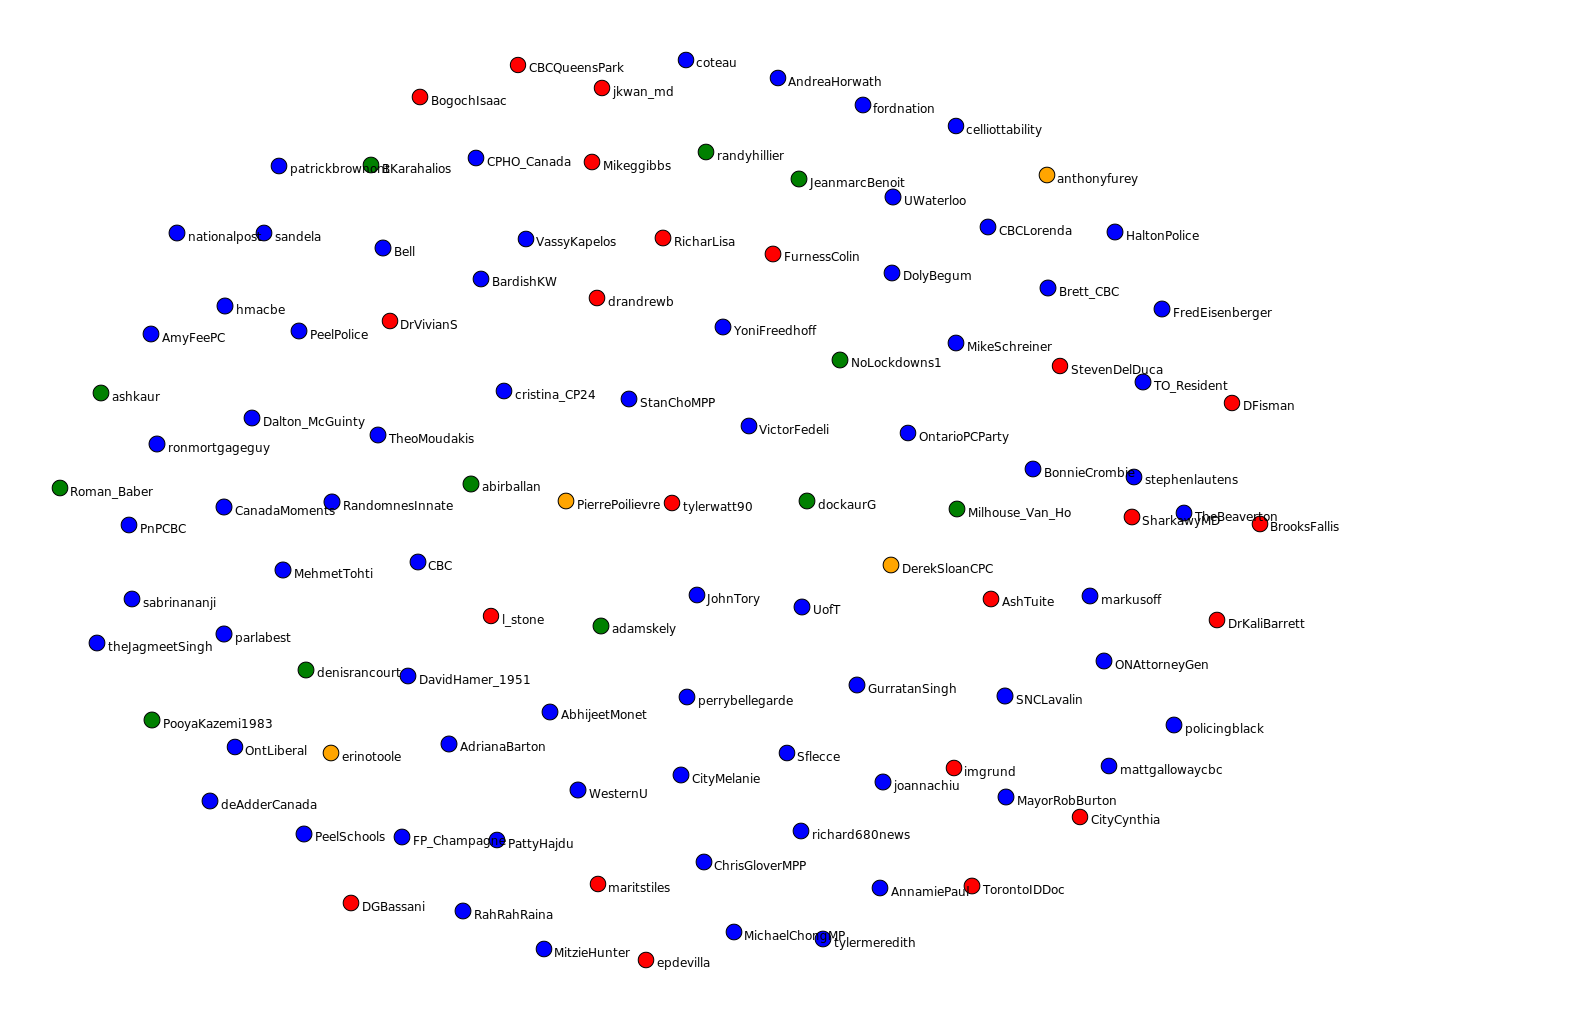

In [210]:
from sknetwork.clustering import KMeans
kmeans = KMeans(n_clusters=4)
km_label = kmeans.fit_transform(adjacency)
image = svg_graph(
    adjacency, # default to spring embedding 
    names = names,
    scale=3,
    labels = km_label,
    display_edges = True, # no clustering is used - arbitrary
    node_size_min = 1, # values set for aesthetics 
    node_size_max = 8,
    display_node_weight = True, # same as above
    edge_width_min = 0.05,
    edge_width_max = 0.05,  
    )
SVG(image)

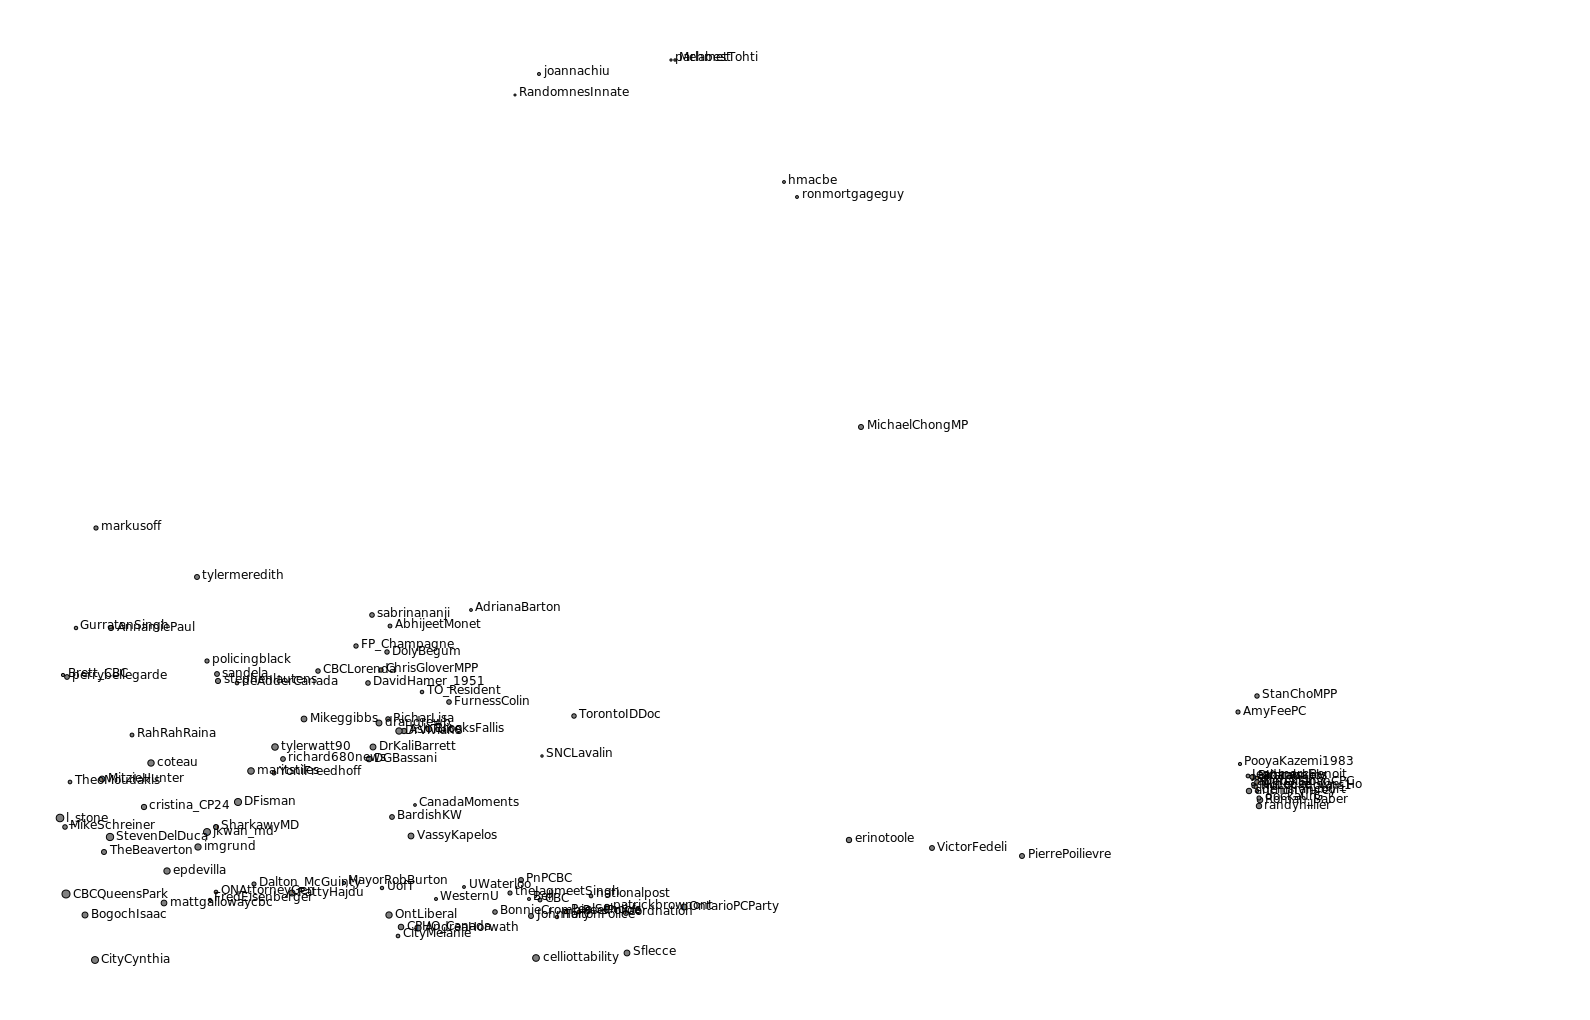

In [214]:
from sknetwork.embedding import Spectral

onpoli.get_skngraph(soergel=False)
graph = onpoli.graph 
spec = Spectral(3)
adjacency = graph.adjacency
spec_embed = spec.fit_transform(adjacency)


image = svg_graph(
    adjacency, 
    position=spec_embed,
    names = names,
    scale=3,
    display_edges = True, # no clustering is used - arbitrary
    node_size_min = 1, # values set for aesthetics 
    node_size_max = 4,
    display_node_weight = True, # same as above
    edge_width_min = 0.05,
    edge_width_max = 0.05,  
    )
SVG(image)




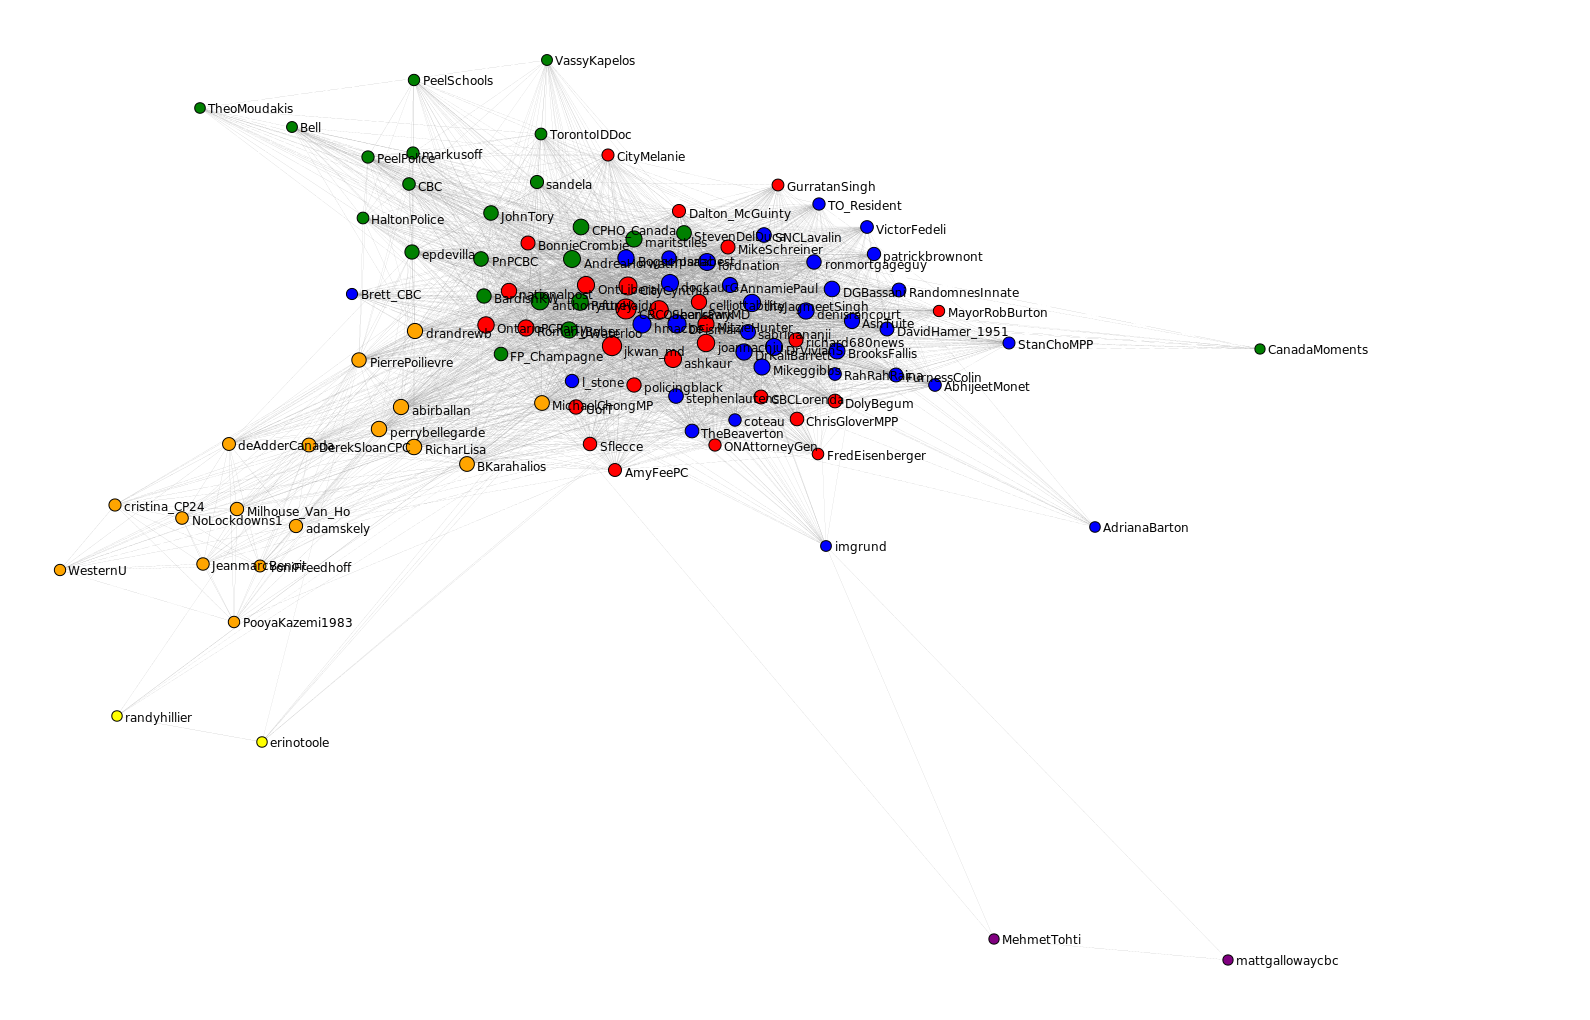

In [292]:
from IPython.display import SVG
import sknetwork.clustering as cluster 
import sknetwork.ranking as sknr
h = onpoli.handle 
graph=onpoli.get_skngraph(soergel=False, min_weight=0.01).graph
adjacency = graph.adjacency

c = cluster.Louvain()
clust = c.fit_transform(adjacency)
image = svg_graph(
    adjacency,
    names = names,
    scores=clust, 
    labels=clust,
    scale=3,
    display_edges = True, # no clustering is used - arbitrary
    node_size_min = 5, # values set for aesthetics 
    node_size_max = 10,
    display_node_weight = True, # same as above
    edge_width_min = 0.05,
    edge_width_max = 0.07, 
    )
SVG(image)

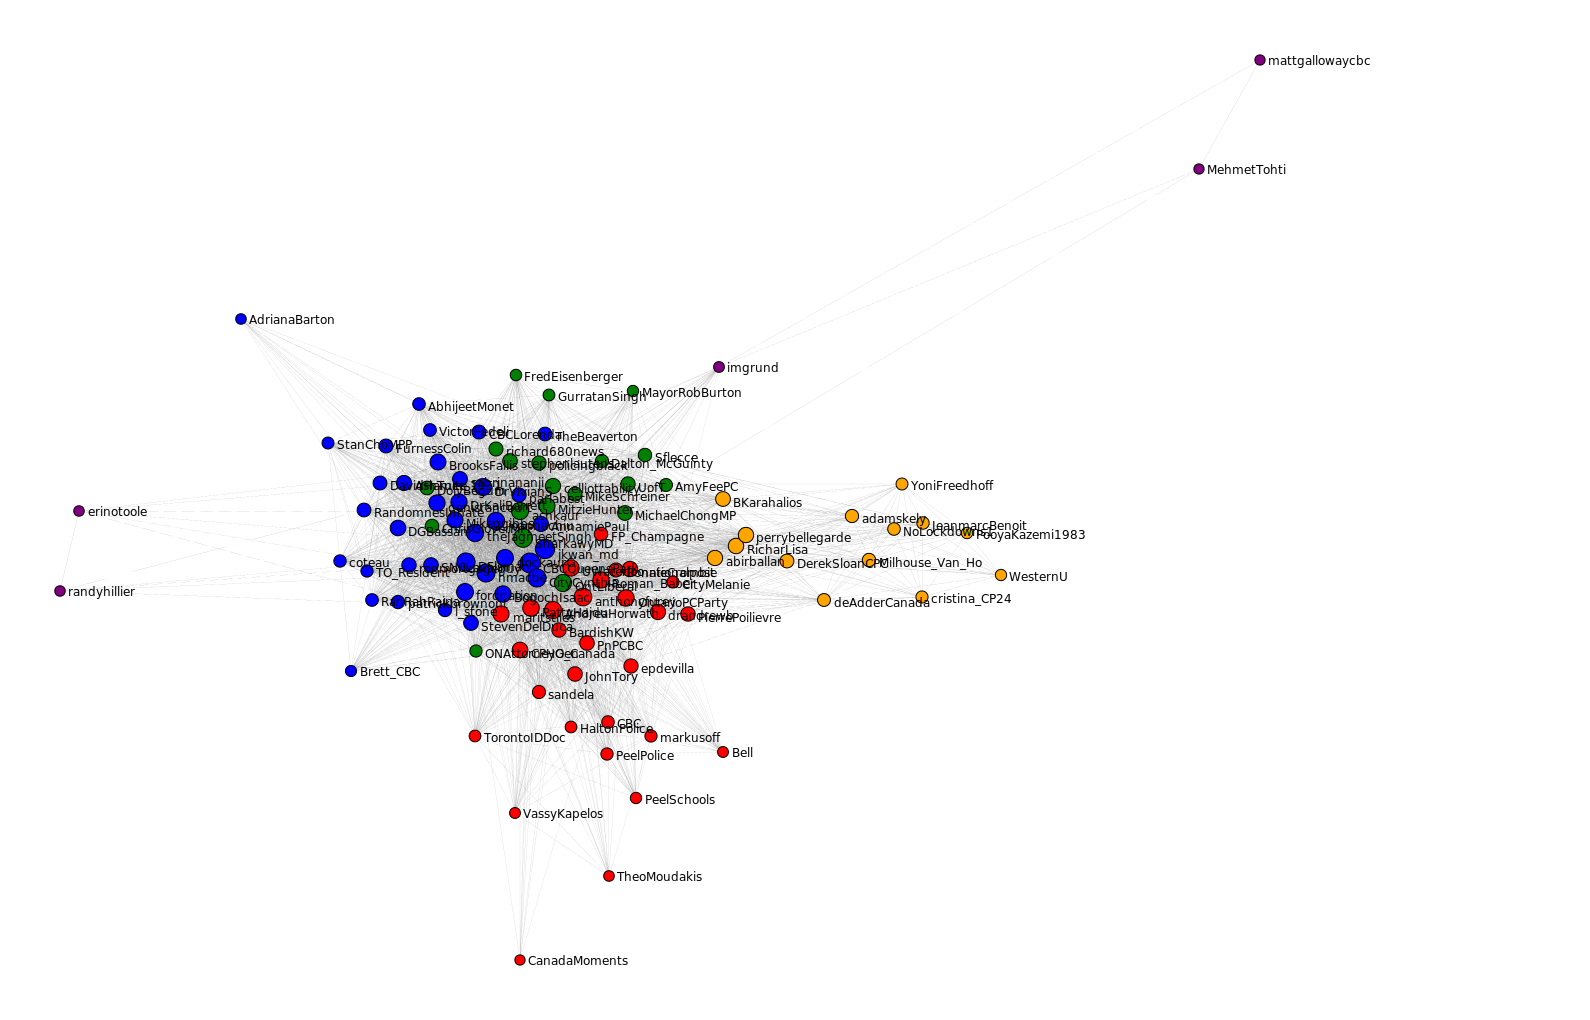

In [293]:
c = cluster.KMeans(5)
clust = c.fit_transform(adjacency)
image = svg_graph(
    adjacency,
    names = names,
    scores=clust, 
    labels=clust,
    scale=3,
    display_edges = True, # no clustering is used - arbitrary
    node_size_min = 5, # values set for aesthetics 
    node_size_max = 10,
    display_node_weight = True, # same as above
    edge_width_min = 0.05,
    edge_width_max = 0.07, 
    )
SVG(image) 